In [1]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from tensorflow import keras
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import cross_val_score  
import numpy as np

2023-05-10 20:10:18.962195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 20:10:19.097270: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-10 20:10:18.962195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, re

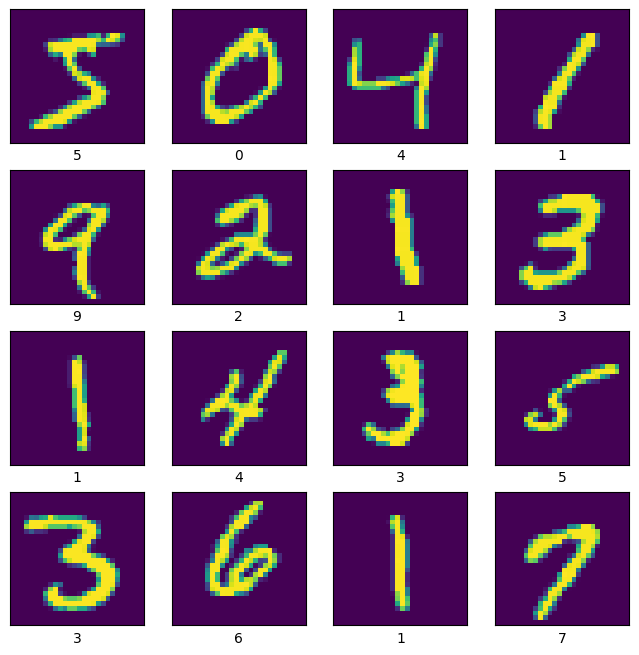

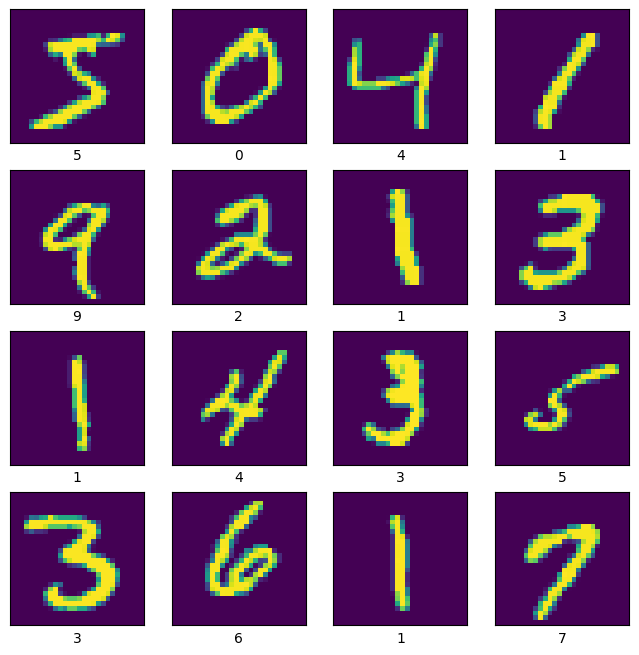

In [2]:
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

#%%
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i])
    plt.xlabel(str(ytrain[i]))
plt.show()

In [3]:
xtrain = xtrain.reshape(np.shape(xtrain)[0], 784)
xtest = xtest.reshape(np.shape(xtest)[0], 784)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

ytrain = ytrain.flatten()
ytest = ytest.flatten()

num_classes = 10
default_hidden_layer_sizes = np.array([784, 784/2])/2
batch_size = 128
epochs = 20

Model: "sequential"
Model: "sequential"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
 dense (Dense)               (None, 392)               307720    
                                                                 
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                1970      
 dense_2 (Dense)             (None, 10)                1970      
                                    

2023-05-10 20:10:26.220318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 20:10:26.715128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9681 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:67:00.0, compute capability: 7.5
2023-05-10 20:10:26.220318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the app

Epoch 1/20
Epoch 1/20


/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-05-10 20:10:28.224081: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa1e1174550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-10 20:10:28.224112: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-05-10 20:10:28.229443: I t

469/469 [==============================] - 5s 6ms/step - loss: 0.5459 - accuracy: 0.8529 - val_loss: 0.2612 - val_accuracy: 0.9242
Epoch 2/20
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2233 - accuracy: 0.9341 - val_loss: 0.1863 - val_accuracy: 0.9442
Epoch 3/20
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1645 - accuracy: 0.9510 - val_loss: 0.1537 - val_accuracy: 0.9529
Epoch 4/20
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1260 - accuracy: 0.9622 - val_loss: 0.1242 - val_accuracy: 0.9612
Epoch 5/20
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1000 - accuracy: 0.9704 - val_loss: 0.1038 - val_accuracy: 0.9680
Epoch 6/20
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0906 - val_accuracy: 0.9718
Epoch 7/20
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0664 - accuracy: 

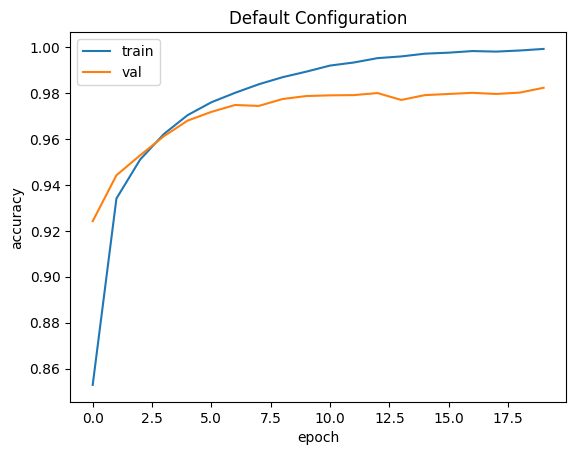

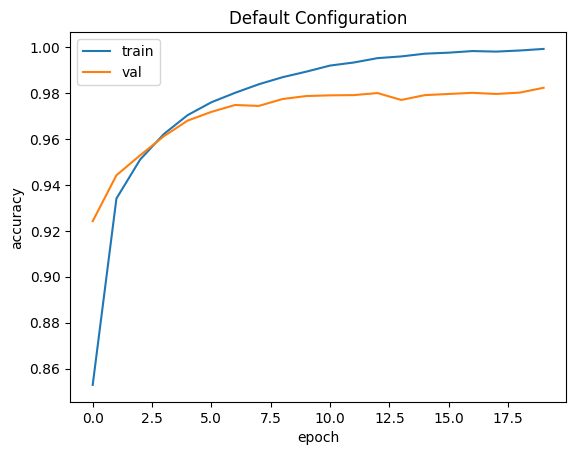

In [4]:
#%% Creating and training the network
# Create the network
def get_model(hidden_layer_sizes=[784/2, 784/4],
            kernel_init="glorot_uniform", bias_init="zeros"):
    input_shape = (784,)

    model = keras.Sequential(
        [keras.Input(shape=input_shape),
        layers.Dense(hidden_layer_sizes[0], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        layers.Dense(hidden_layer_sizes[1], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),])
    return model

#%% Get and train model
model = get_model(hidden_layer_sizes=default_hidden_layer_sizes)
model.summary()

# model.compile(loss="categorical_crossentropy", optimizer="adam", 
#             metrics=["accuracy"])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, 
        validation_data=(xtest, ytest))

# Model evaluation
score = model.evaluate(xtest, ytest, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

#%% Plot training and validation accuracy epoch wise

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
# helper functions for experiments
def plot_exp(xdict, ydict, xlabeltxt, titletxt):

    fig, ax = plt.subplots()
    x, y = list(xdict.keys()), list(ydict.values())
    ax.scatter(x, y)
    ax.set_title(titletxt)
    ax.set_ylabel('accuracy')
    ax.set_xlabel(xlabeltxt)
    for i, txt in enumerate(xdict.values()):
        ax.annotate(txt,  (x[i], y[i]))
    plt.show()

def fit_eval_metrics(model):
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, 
            validation_data=(xtest, ytest), verbose=0)

    # Model evaluation
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    test_acc = model.evaluate(xtest, ytest, verbose=0)[1]
    print("Train acc: ",str(train_acc),", Val acc: ",str(val_acc),
        ", Test acc: ",str(test_acc))
    return train_acc, val_acc, test_acc

def fit_history(lr=1e-3, bs=128):
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit(xtrain, ytrain, batch_size=bs, epochs=epochs, 
            validation_data=(xtest, ytest), verbose=0)

    # Model evaluation
    train_his = history.history['accuracy']
    val_his = history.history['val_accuracy']
    return train_his, val_his




H1: Hidden layer sizes = [1568.  784.]
H1: Hidden layer sizes = [1568.  784.]
Train acc:  0.9978166818618774 , Val acc:  0.9804999828338623 , Test acc:  0.9804999828338623
H2: Hidden layer sizes = [784. 392.]
Train acc:  0.9978166818618774 , Val acc:  0.9804999828338623 , Test acc:  0.9804999828338623
H2: Hidden layer sizes = [784. 392.]
Train acc:  0.9976500272750854 , Val acc:  0.9818999767303467 , Test acc:  0.9818999767303467
H3: Hidden layer sizes = [392. 196.]
Train acc:  0.9976500272750854 , Val acc:  0.9818999767303467 , Test acc:  0.9818999767303467
H3: Hidden layer sizes = [392. 196.]
Train acc:  0.9993666410446167 , Val acc:  0.9794999957084656 , Test acc:  0.9794999957084656
H4: Hidden layer sizes = [196.  98.]
Train acc:  0.9993666410446167 , Val acc:  0.9794999957084656 , Test acc:  0.9794999957084656
H4: Hidden layer sizes = [196.  98.]
Train acc:  0.9986833333969116 , Val acc:  0.9800999760627747 , Test acc:  0.9800999760627747
H5: Hidden layer sizes = [98. 49.]
Train a

/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


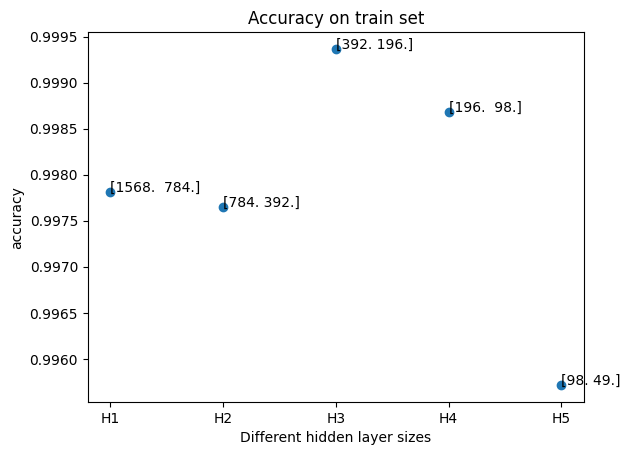

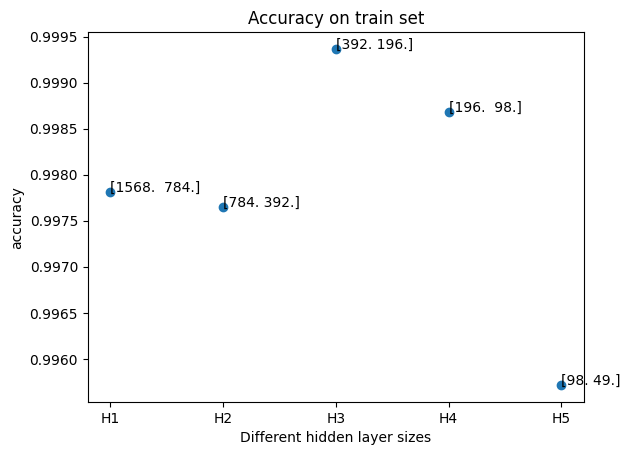

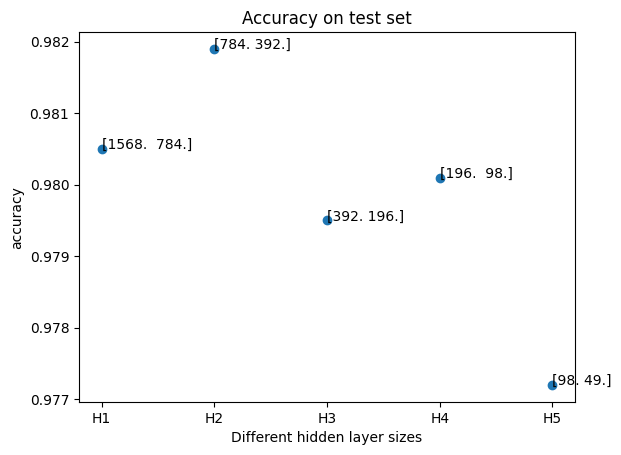

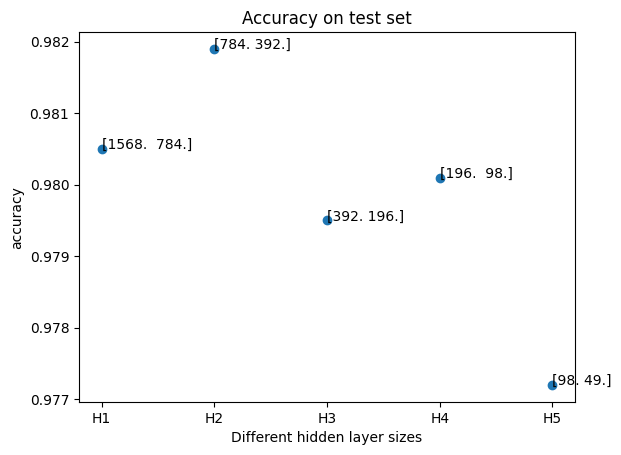

In [6]:
# Experiment: Different sizes of hidden layers
hls = np.array([784, 784/2])
hidden_layer_sizes = {'H1': hls*2, 'H2': hls, 
                    'H3': hls/2, 'H4': hls/4, 'H5': hls/8}
exp_dict = hidden_layer_sizes
train_accs, val_accs, test_accs = {}, {}, {}

def fit_and_eval_hls(hs):
    model = get_model(hidden_layer_sizes=hs)
    return fit_eval_metrics(model)

for i in exp_dict:
    print(i+": Hidden layer sizes = "+str(exp_dict[i]))
    train_accs[i], val_accs[i], test_accs[i] = \
        fit_and_eval_hls(exp_dict[i])
        
# Plot results

xdict = exp_dict
xlabeltxt = 'Different hidden layer sizes'

plot_exp(xdict, train_accs, xlabeltxt, "Accuracy on train set")
plot_exp(xdict, test_accs, xlabeltxt, "Accuracy on test set")

L1: Learning rate = 1e-05
L1: Learning rate = 1e-05
L2: Learning rate = 0.0001
L2: Learning rate = 0.0001
L3: Learning rate = 0.001
L3: Learning rate = 0.001
L4: Learning rate = 0.01
L4: Learning rate = 0.01
L5: Learning rate = 0.1
L5: Learning rate = 0.1


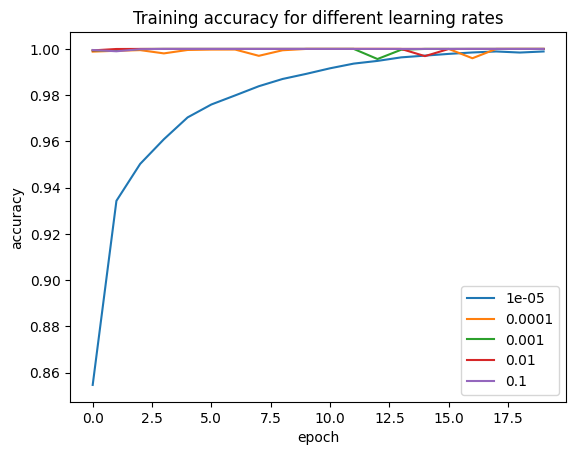

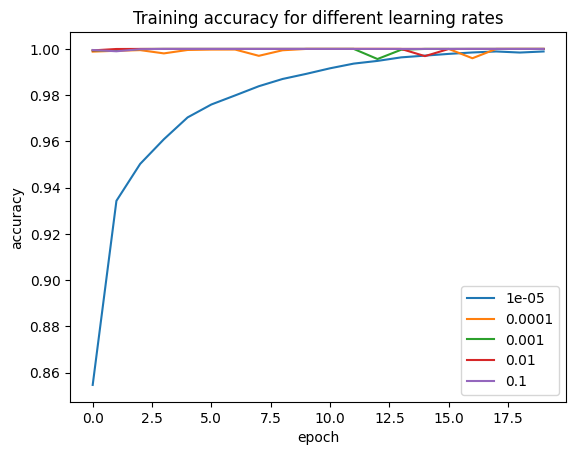

In [7]:
# Experiment: Different learning rates
lr_inits = {'L1': 1e-5, 'L2': 1e-4, 'L3': 1e-3, 'L4': 1e-2, 'L5': 1e-1}

exp_dict = lr_inits

train_his, val_his = {}, {}
model = get_model()

for i in exp_dict:
    print(i+": Learning rate = "+str(exp_dict[i]))
    train_his[i], val_his[i] = fit_history(lr=exp_dict[i])
    # plt.plot(train_his[i])

# plot
for i in train_his:
    plt.plot(train_his[i])
legend = list(exp_dict.values())
titletxt = 'Training accuracy for different learning rates'
plt.title(titletxt)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(legend, loc='lower right')
plt.show()

Max value in training set =  1.0
New input dimension with PCA =  43
Model: "sequential_7"
Max value in training set =  1.0
New input dimension with PCA =  43
Model: "sequential_7"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 43)                1892      
 dense_21 (Dense)            (None, 43)                1892      
                                                                 
                                                                 
 dense_22 (Dense)            (None, 21)                924       
 dense_22 (Dense)            (None, 21)                924       
                                                                 
                                                                 
 dense_23 (Dense)           

/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/u/efk7cz/.conda/envs/dm1/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 4s 5ms/step - loss: 2.2802 - accuracy: 0.1954 - val_loss: 2.2192 - val_accuracy: 0.4353
Epoch 2/30
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 2.0001 - accuracy: 0.5435 - val_loss: 1.6614 - val_accuracy: 0.6245
Epoch 3/30
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 1.3290 - accuracy: 0.7180 - val_loss: 1.0363 - val_accuracy: 0.7814
Epoch 4/30
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.8781 - accuracy: 0.8028 - val_loss: 0.7305 - val_accuracy: 0.8327
Epoch 5/30
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6742 - accuracy: 0.8349 - val_loss: 0.5964 - val_accuracy: 0.8532
Epoch 6/30
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.5780 - accuracy: 0.8497 - val_loss: 0.5274 - val_accuracy: 0.8593
Epoch 7/30
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.5229 - accuracy: 

Epoch 30/30
Epoch 30/30
313/313 [==============================] - 1s 3ms/step - loss: 0.3063 - accuracy: 0.9093
Test loss: 0.30634456872940063
Test accuracy: 0.9093000292778015
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Test loss: 0.30634456872940063
Test accuracy: 0.9093000292778015
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


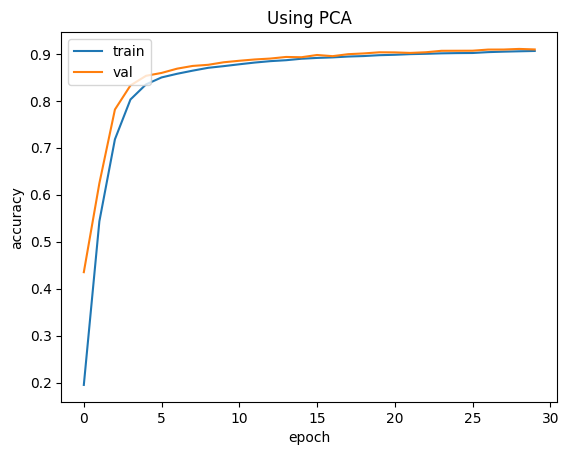

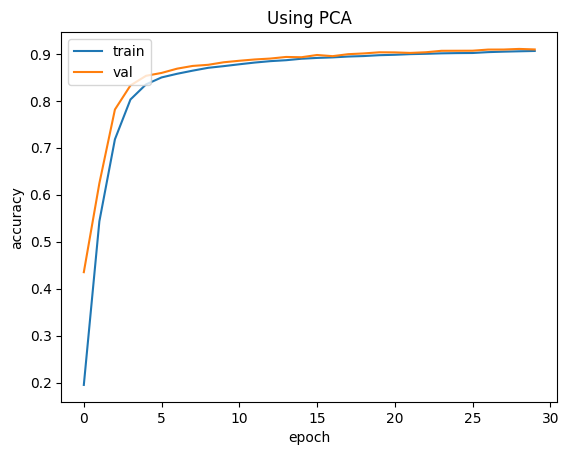

In [8]:
# Experiment: PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale



#Complete dataset
xdata = np.concatenate((xtrain,xtest),axis=0)
ydata = np.concatenate((ytrain,ytest),axis=0)
#print(np.max(xtrain))

#%%

data_variance = 0.8

pca = PCA(data_variance)

pca.fit(xdata)

pca_xdata = pca.transform(xdata)

scaled_xdata = minmax_scale(pca_xdata)

xtrain, xtest = np.split(scaled_xdata,[60000])

print('Max value in training set = ', np.max(xtrain))

input_shape = np.shape(xtrain)[1]
print('New input dimension with PCA = ', input_shape)
num_classes = 10
batch_size = 128
epochs = 30
hidden_layer_sizes = np.int32([input_shape, input_shape/2])

#%% Creating and training the network
# Create the network
def get_model(hidden_layer_sizes=[784/2, 784/4],
            kernel_init="glorot_uniform", bias_init="zeros"):

    model = keras.Sequential(
        [keras.Input(shape=input_shape),
        layers.Dense(hidden_layer_sizes[0], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        layers.Dense(hidden_layer_sizes[1], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),])
    return model

#%% Get and train model
model = get_model(hidden_layer_sizes)
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, 
        validation_data=(xtest, ytest))

# Model evaluation
score = model.evaluate(xtest, ytest, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

#%% Plot training and validation accuracy epoch wise

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Using PCA')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

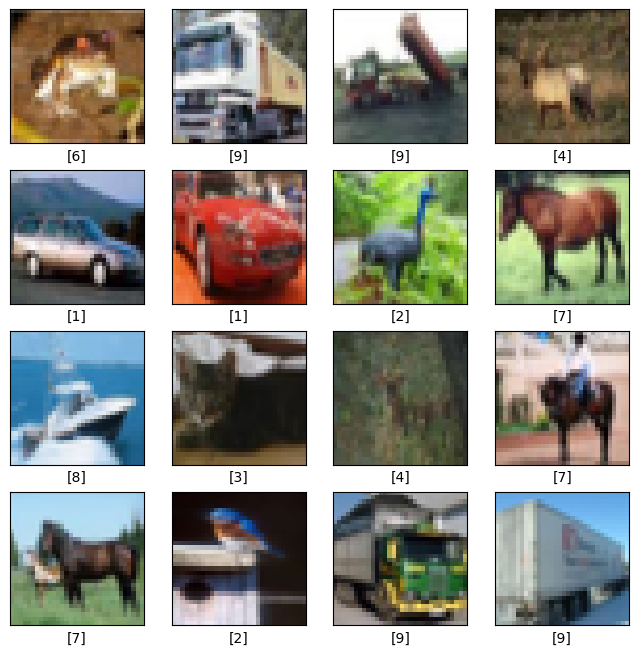

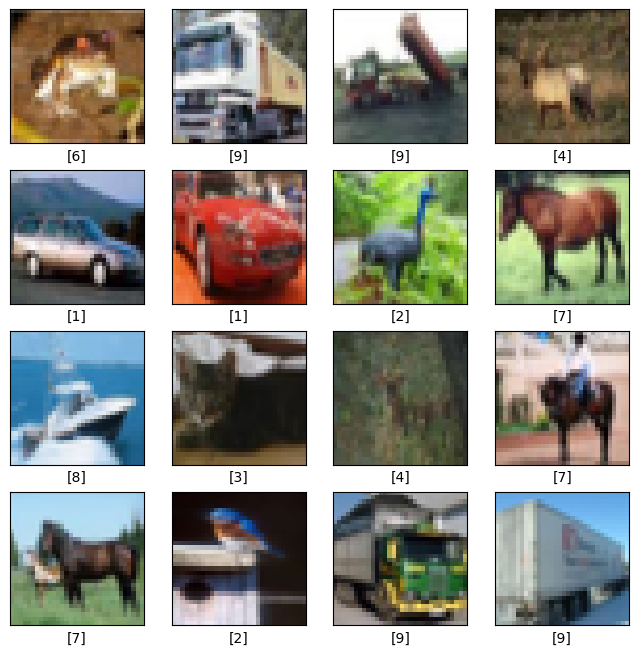

In [9]:
# Now for cifar-10 dataset
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

#%%
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i])
    plt.xlabel(str(ytrain[i]))
plt.show()

xtrain = xtrain.reshape(np.shape(xtrain)[0], 3072)
xtest = xtest.reshape(np.shape(xtest)[0], 3072)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

ytrain = ytrain.flatten()
ytest = ytest.flatten()


Model: "sequential_9"
Model: "sequential_9"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 3072)              9440256   
 dense_31 (Dense)            (None, 3072)              9440256   
                                                                 
                                                                 
 dense_32 (Dense)            (None, 1536)              4720128   
 dense_32 (Dense)            (None, 1536)              4720128   
                                                                 
                                                                 
 dense_33 (Dense)            (None, 768)               1180416   
 dense_33 (Dense)            (None, 768)               1180416   
                                

Epoch 22/30
Epoch 22/30
391/391 [==============================] - 3s 7ms/step - loss: 1.3017 - accuracy: 0.5309 - val_loss: 1.4339 - val_accuracy: 0.4746
Epoch 23/30
Epoch 23/30
391/391 [==============================] - 3s 7ms/step - loss: 1.2912 - accuracy: 0.5321 - val_loss: 1.4896 - val_accuracy: 0.4778
Epoch 24/30
Epoch 24/30
391/391 [==============================] - 3s 7ms/step - loss: 1.2757 - accuracy: 0.5408 - val_loss: 1.4256 - val_accuracy: 0.4959
Epoch 25/30
Epoch 25/30
391/391 [==============================] - 3s 7ms/step - loss: 1.2723 - accuracy: 0.5398 - val_loss: 1.4449 - val_accuracy: 0.4809
Epoch 26/30
Epoch 26/30
391/391 [==============================] - 3s 7ms/step - loss: 1.2653 - accuracy: 0.5440 - val_loss: 1.4228 - val_accuracy: 0.4893
Epoch 27/30
Epoch 27/30
391/391 [==============================] - 3s 7ms/step - loss: 1.2552 - accuracy: 0.5450 - val_loss: 1.4141 - val_accuracy: 0.4988
Epoch 28/30
Epoch 28/30
391/391 [==============================] - 3s 

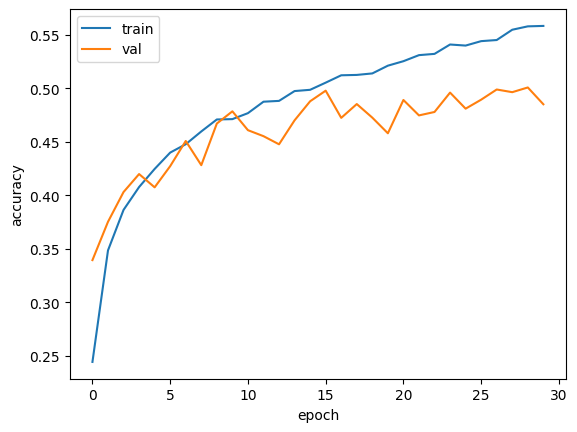

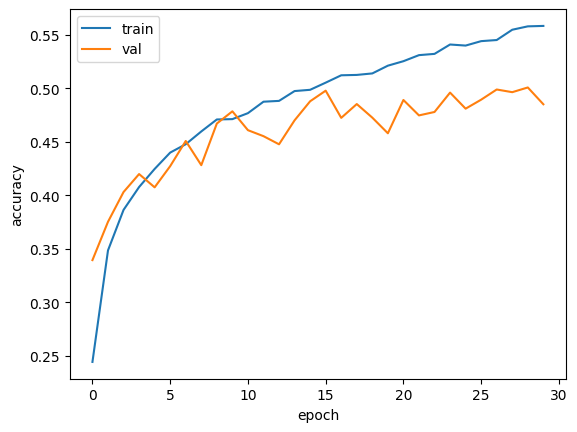

In [12]:
# Create the network
def get_model_cifar(hidden_layer_sizes=[3072, 3072/2, 3072/4, 3072/8, 3072/16],
            kernel_init="glorot_uniform", bias_init="zeros"):
    input_shape = (3072,)

    model = keras.Sequential(
        [keras.Input(shape=input_shape),
        layers.Dense(hidden_layer_sizes[0], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        layers.Dense(hidden_layer_sizes[1], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        layers.Dense(hidden_layer_sizes[2], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        layers.Dense(hidden_layer_sizes[3], activation="sigmoid", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),
        layers.Dense(num_classes, activation="softmax", 
                    kernel_initializer=kernel_init,
                    bias_initializer=bias_init),])
    return model

#%% Get and train model
model = get_model_cifar()
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, 
        validation_data=(xtest, ytest))

# Model evaluation
score = model.evaluate(xtest, ytest, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

#%% Plot training and validation accuracy epoch wise

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()